In [8]:
# Librairies
import os
import sys
code_path = os.path.split(os.getcwd())[0]
sys.path.append(code_path)
import numpy as np
from setting import *
from loader import *
from graphs import *
from utils import *
from plots_and_stats import *

In [9]:
# Arguments
name = "demo"

In [10]:
# Path
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)
create_new_folder(os.path.join(save_path, 'figures'))

In [11]:
# Load dataset
dataset = np.load(os.path.join(data_path, name + '.npy'), allow_pickle=True).item()
X = dataset['X']
y = dataset['y']
n_class = dataset['n_class']
n_pathway = dataset['n_pathway']
n_gene = dataset['n_gene']
alpha = dataset['alpha']
eta = dataset['eta']
beta = dataset['beta']
useful_paths = dataset['useful_paths']
useful_genes = dataset['useful_genes']

In [13]:
# Data description
print(f"Number of classes: {n_class}\nNumber of variables: {X.shape[1]}\nNumber of samples: {X.shape[0]}")
for c in range(n_class):
    print(f"    Class {c} - {np.sum(y==c)}")
print(f"Number of pathways: {n_pathway}")

if len(np.unique([len(seq) for seq in list(useful_genes.values())])) == 1:
    print(f"Number of genes per pathway: {np.unique([len(seq) for seq in list(useful_genes.values())])[0]}")
else:
    for p in useful_genes.keys():
        print(f"    Number of genes in {p}: {len(useful_genes[p])}")
if len(np.unique([len(seq) for seq in list(useful_paths.values())])) == 1:
    print(f"Number of over-expressed pathways in each class: {np.unique([len(seq) for seq in list(useful_paths.values())])[0]}")
else:
    for c in useful_paths.keys():
        print(f"    Number of over-expressed pathways in class {c}: {len(useful_genes[p])}")

Number of classes: 2
Number of variables: 60
Number of samples: 600
    Class 0 - 300
    Class 1 - 300
Number of pathways: 6
Number of genes per pathway: 10
Number of over-expressed pathways in each class: 2


In [14]:
assert len(np.unique(np.round(np.sum(X, axis=1), 5))) == 1
print(f"Sum of the variables in each sample: {np.int32(np.unique(np.round(np.sum(X, axis=1), 5))[0])}")

Sum of the variables in each sample: 1000000


Signals averaged per class


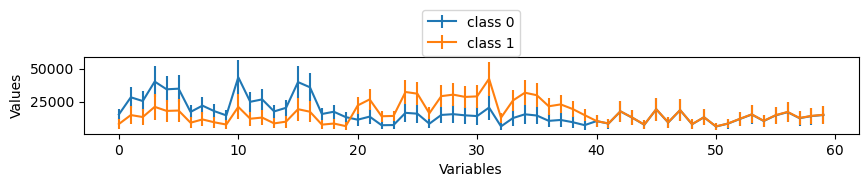

In [15]:
print("Signals averaged per class")
save_name = os.path.join(save_path, 'figures', "raw_average_signals")
plot_average_signals(X, y, n_variable=2000, save_name=save_name)

In [17]:
print_average_signals(X, y, var_list=[0, 20, 40])      

Average signals +- standard deviations for variables in [0, 20, 40]
    Class 0  - [15283. 11294. 10227.]  +-  [4388. 4812. 4700.]
    Class 1  - [ 7996. 22126. 10292.]  +-  [3733. 6382. 4651.]


Random signals


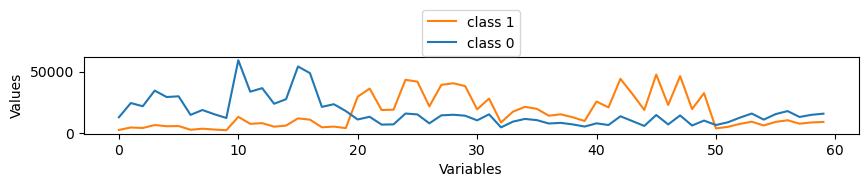

In [18]:
print("Random signals")
save_name = os.path.join(save_path, 'figures', "raw_random_signals")
plot_random_signals(X, y, n_sample_per_class=1, n_variable=100, save_name=save_name)

Relative proportion of groups in an example $e$ of class $c$ 
$$\theta_e \sim Dirichlet(\alpha_c)$$

Class C0
    Parameter of the Dirichlet distribution: [8. 8. 4. 4. 4. 4.]
    Realisation: [0.3774149  0.22067234 0.09185842 0.15065415 0.05618929 0.1032109 ]


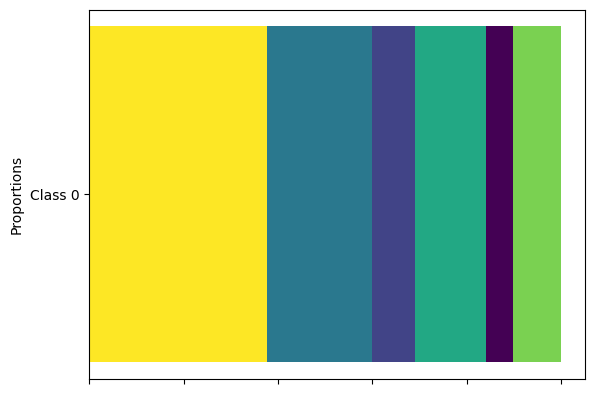

In [19]:
label_key = 'Class'
save_name = os.path.join(save_path, 'figures', "relative_proportion_of_groups_in_a_class_from_alpha")
dict_real = draws_from_Dirichlet({'C0': alpha['C0']}, label_key)
plot_draws_from_Dirichlet(dict_real, label_key, label_var='Pathway', save_name=save_name)

Relative proportion of variables in a group $g$ 
$$\beta_g \sim Dirichlet(\eta_g)$$

Pathway P0
    Parameter of the Dirichlet distribution: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    Realisation: [0.07461275 0.08008957 0.10767759 0.0729537  0.07021695 0.11900251
 0.16076819 0.17300332 0.06538242 0.076293  ]


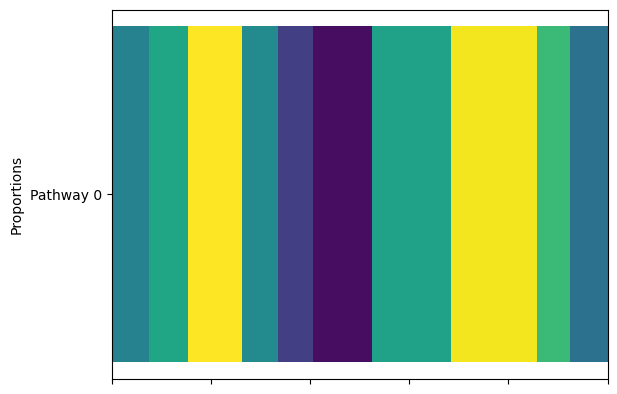

In [20]:
label_key = 'Pathway'
save_name = os.path.join(save_path, 'figures', "relative_proportion_of_variables_in_a_group_from_eta")
dict_real = draws_from_Dirichlet({'P0': eta['P0']}, label_key)
plot_draws_from_Dirichlet(dict_real, label_key, label_var='Gene', save_name=save_name)

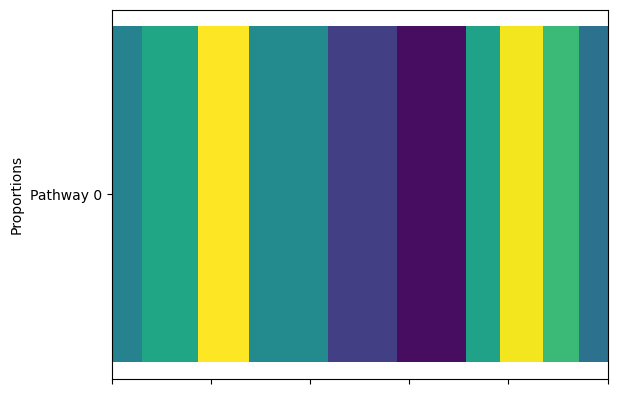

In [21]:
label_key = 'Pathway'
save_name = os.path.join(save_path, 'figures', "relative_proportion_of_variables_in_a_group_from_beta")
plot_draws_from_Dirichlet({'P0': beta['P0']}, label_key, label_var='Gene', save_name=save_name)

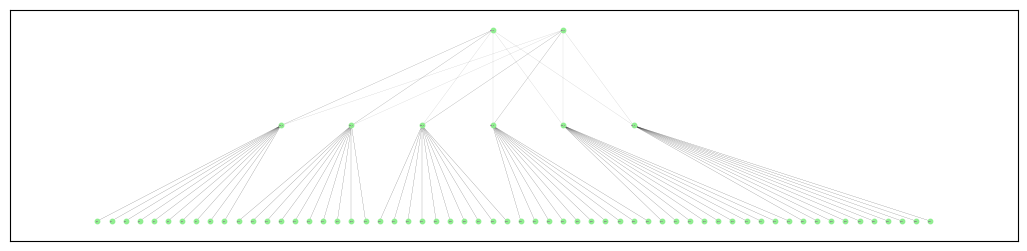

In [22]:
save_name = os.path.join(save_path, 'figures', "graph")
draw_a_graph_representing_data_simulated_with_LDA(n_class, n_pathway, n_gene, alpha, eta, node_size=10, font_size=1, save_name=save_name)